### CUSTOMER CHURN PREDICTION USING CLASSIFICATION ANALYSIS


*Churn* refers to the number of customers who stop using a product or service over a given period of time. Customers churn due to various reasons such as poor customer service, product dissatisfaction, price sensitivity, better alternatives, and changes in circumstances e.g. relocation. A data analyst finds the factors causing churn in data and works towards preventing it.

*Churn prediction* is the process of using data and analytical models to identify which customers are most likely to stop doing business with or using a company’s product or service in the near future. With churn prediction, a company can take proactive measures to retain customers who are at risk of leaving. Churn prediction helps them to focus more on the customers that are at a high risk of leaving.
Examples: Netflix subscription, Network service providers

*Classification analysis* is a data analytics technique that can be used to predict customer churn. Data analytics professionals typically use *machine learning algorithms* such as logistic regression, decision trees, and support vector machines to predict customer churn using classification analysis. These algorithms analyze data such as customer demographics, purchase history, and interactions with the company to identify patterns that can predict customer churn.


### Hypothesis
**Null hypothesis**: 
    there is a significant relationship between _customer churn_ and at least two of the **independent variables**
    _(gender, senior citizen status, artner, dependents, tenure, phone service, multiple lines, internet service, online security,online backup, device protection, tech support, streaming TV, streaming movies, contract, paperless billing, payment method, monthly charges, total charges)_.

**Alternative hypothesis**: 
  There is no significant relationship between any of independent variable and customer churn.


### Questions
1. Is there a difference in churn rates between male and female customers?

2. Are the customers who get TechSupport service less likey to churn?

3. Does the payment method have an impact on customer churn?

4. Is there a correlation between contract length and customer churn?

5. Is there a correlation between the Total Charges and customer churn?

6. Do customers who have online security and backup services have lower churn rates?

7. Are customers with dependents less likely to churn compared to those without dependents?

8. Is there a relationship between the customers who get Device protections and churn?


## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [80]:
# !pip install -q <lib_001> <lib_002> ...
! pip install imbalanced-learn


     ------------------------------------ 226.0/226.0 kB 300.5 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [82]:
# Data handling
import pandas as pd
import numpy as np


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

# EDA (pandas-profiling, etc. )
import ydata_profiling as pp


# Feature Processing (Scikit-learn processing, etc. )
import sklearn 
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline  import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder



# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

import warnings
warnings.filterwarnings("ignore")


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [87]:
# For CSV, use pandas.read_csv
df = pd.read_csv(r"C:\Users\USER\Downloads\Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [4]:
# Use pandas_profiling.ProfileReport method
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
#check the number of columns  and rows
df.shape

(7043, 21)

In [48]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#Check missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in churn column because of our ML model
df.loc[df.Churn == 'Yes','Churn'] = 1
df.loc[df.Churn == 'No','Churn'] = 0


In [8]:
# convert string values 'Female' and 'Male' to numeric values '1' and '0' in gender column
df.loc[df.gender == 'Female','gender'] = 1
df.loc[df.gender == 'Male','gender'] = 0

In [9]:
# convert 'No internet service' to 'No' for columns 'OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTv'
cols = ['OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for i in cols :
    df[i] = df[i].replace({'No internet service': 'No'})


In [10]:
#Replace 'No internet service' and 'No phone service' with 'No'
df.replace(['No internet service','No phone service'], 'No', inplace=True)

#'TotalCharges' is categorical but has some float values

#Change the datatype to float for datatype consistency


In [11]:
#Replaces the spaces with null values
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)


In [12]:
#Drop the null value feature which contain .50% missing values
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

In [13]:
#Convert 'TotalCharges' column to float datatype
df['TotalCharges'] = df["TotalCharges"].astype(float)

In [14]:
# value count on 'Churn'  #Distribution of target column
df["Churn"].value_counts().values

array([5163, 1869], dtype=int64)

It shows that there's a slight data imbalance

# Data Visualization

### Total customer churn

In [15]:
#visualizing the total customer churn
churn_labels = df["Churn"].value_counts().keys().tolist()
churn_values = df["Churn"].value_counts().values.tolist()
plot_data = [go.Pie(labels=churn_labels,
                    values=churn_values,
                    marker=dict(colors=['grey','orange'], line=dict(color="purple",width=1.5)),
                    rotation=90,
                    hoverinfo="label+value+text",
                    hole= .6)          
            ]                    
plot_layout = go.Layout(dict(title="Customer Churn",
                             plot_bgcolor='rgb(243,243,243)',
                             paper_bgcolor='rgb(243,243,243)')) 
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)                                       

### Distribution of the target variable (Churn)

<AxesSubplot: xlabel='Churn', ylabel='count'>

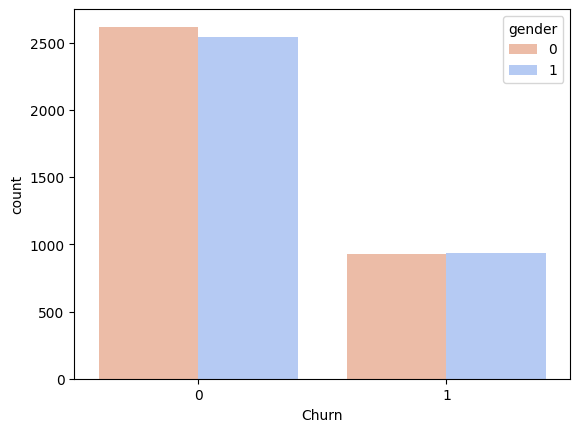

In [16]:
# Check the distribution of the target variable (Churn)
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

### Questions

### *Q*1. Is there a difference in churn rates between male and female customers?

In [17]:
#visualize churn by gender
plot_by_gender = df.groupby('gender').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_gender['gender'],
    y=plot_by_gender['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Gender',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)   

From the above graph, the number of male and females who churned is almost similar with that of felame being slightly higher. Thus, the churn rate is relatively equal.

### *Q*2. Are the customers who get TechSupport service less likey to churn?

In [18]:
#visualize churn by TechSupport
plot_by_TechSupport = df.groupby('TechSupport').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_TechSupport['TechSupport'],
    y=plot_by_TechSupport['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by TechSupport',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)  

_From the above, it is observed that the customers that did not have TechSuport had the highest attrition. It's therefore necessary to initiate measure of encouraging more customers to use TechSupport services in order to reduce the customers' turnover probability._

### *Q*3. Does the payment method have an impact on customer churn?

In [19]:
#visualize churn by PaymentMethod
plot_by_PaymentMethod = df.groupby('PaymentMethod').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_PaymentMethod['PaymentMethod'],
    y=plot_by_PaymentMethod['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by PaymentMethod',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)  

_Based on the findings above, we can observe that payment method does have an impact on customer churn. However, we can conclude that customers using electronic check as their payment method have a significantly higher churn rate compared to other payment methods_.

_This insight can help inform strategies to reduce churn, such as promoting alternative payment methods or providing incentives for customers to switch from electronic check to more stable payment methods_

### InternetService by churn

In [20]:
#visualize churn by InternetService
plot_by_InternetService = df.groupby('InternetService').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_InternetService['InternetService'],
    y=plot_by_InternetService['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by InternetService',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)  

Customers with fiber optic as InternetService are most likely to churn 

One of the reasons could be price

### *Q*4. Is there a correlation between contract length and customer churn?

In [21]:
#visualize churn by Contract
plot_by_Contract = df.groupby('Contract').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_Contract['Contract'],
    y=plot_by_Contract['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Contract',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)  

_From the graph **Churn by Contract**, we can see that more customers that churn have the Month-to-Month subscription. We can therefore conclude that there is a negative correlation between the contact length and customer churn; i.e the shorter the contract length, the more likely the customer will churn._

### Churn by tenure

In [22]:
#visualize churn by Tenure
plot_by_tenure = df.groupby('tenure').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_tenure['tenure'],
    y=plot_by_tenure['Churn'],
    
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Tenure',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)  

The higher the tenure the lower the churn

### Distribution of 'MonthlyCharges'

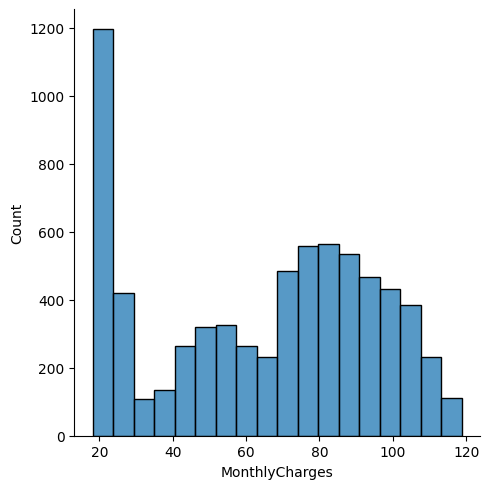

In [23]:
# visualize the distribution of 'MonthlyCharges'
sns.displot(df, x=df.MonthlyCharges)

### 'TotalCharges' to analyze the distribution of customers

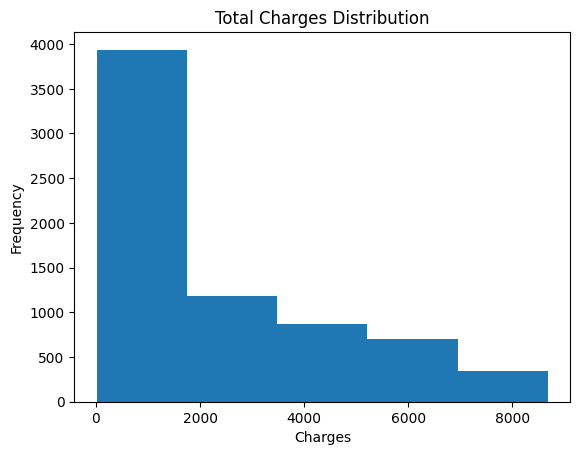

In [24]:
# Create a histogram of TotalCharges to analyze the distribution of customers 

plt.hist(df['TotalCharges'], bins=5)
plt.title('Total Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

### Numerical features

### *Q*5. Is there a correlation between the TotalCharges and customer churn?

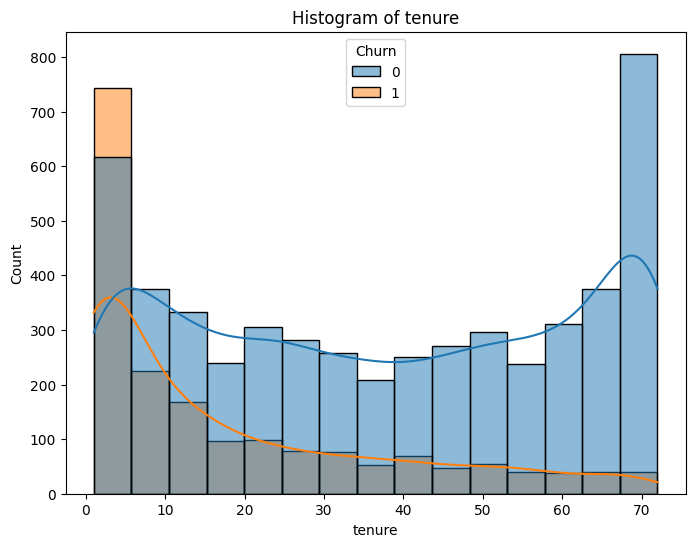

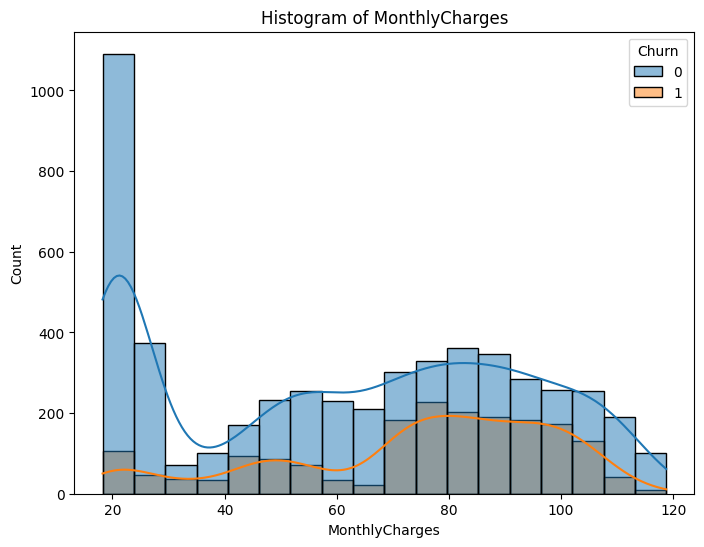

In [25]:
#Declare a library to hold the Numerical features
numerical_cols = ['tenure', 'MonthlyCharges']

# Plot histograms for Numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### *Q*6. Do customers who have online security and backup services have lower churn rates?

<AxesSubplot: xlabel='security_backup', ylabel='count'>

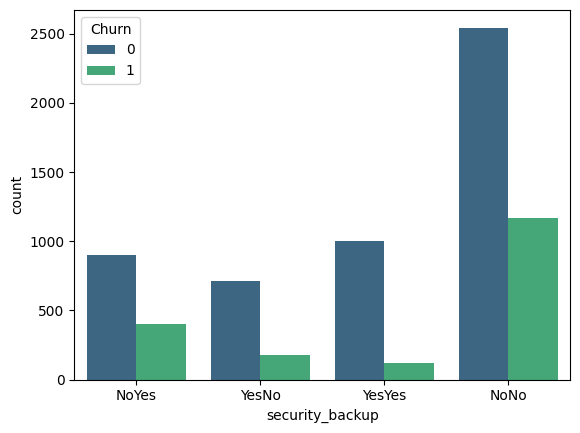

In [26]:
df['security_backup'] = df.OnlineSecurity + df.OnlineBackup

df['security_backup'] = df.security_backup.replace({2:1})

sns.countplot(df,x='security_backup', hue='Churn', palette='viridis')

_From the graph above, while it is evident that that there is lower churn rates for customers with online security and onlineBackup services, there was still more customers that did not have these services but still churned_

<AxesSubplot: xlabel='tenure', ylabel='MonthlyCharges'>

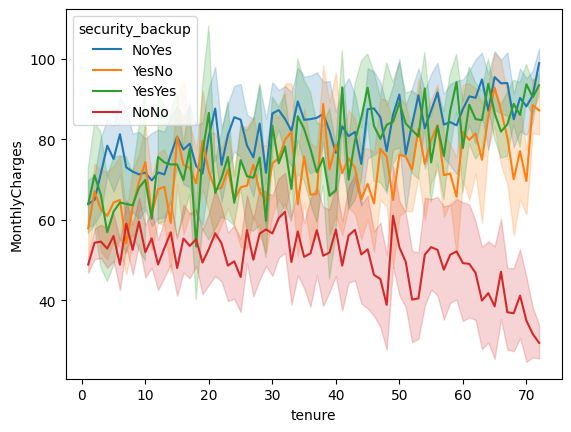

In [27]:
sns.lineplot(x="tenure", y="MonthlyCharges",hue="security_backup",data=df )

### Monthly charges and churn

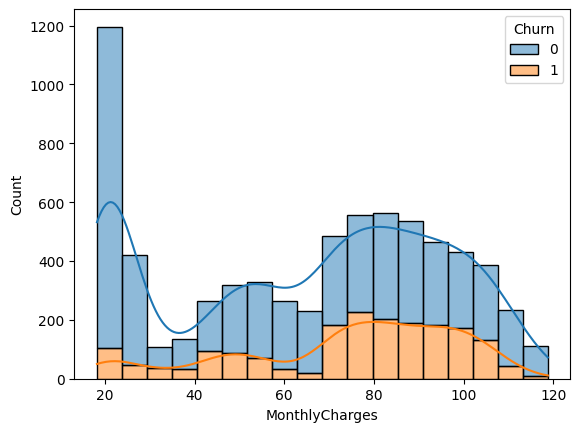

In [29]:
# Using a Histogram, visualize monthly charges and churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.show()

### Correlation between numerical features and target variable

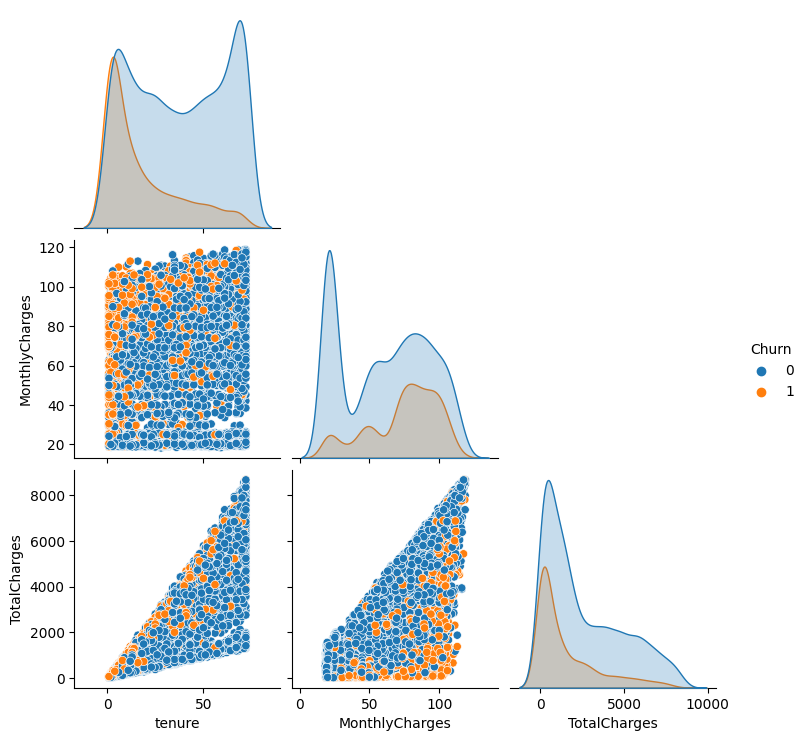

In [28]:
# Check the correlation between numerical features and target variable
# Numerical feature = 'tenure', 'MonthlyCharges', 'TotalCharges'
# Target variable = 'Churn'
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df[numerical_cols + ['Churn']]
sns.pairplot(df_num, hue='Churn', corner=True)
plt.show()

#From the graphs above, we see that most people with low tenure and high monthly charge are most likely to churn

### Correlation matrix of all features

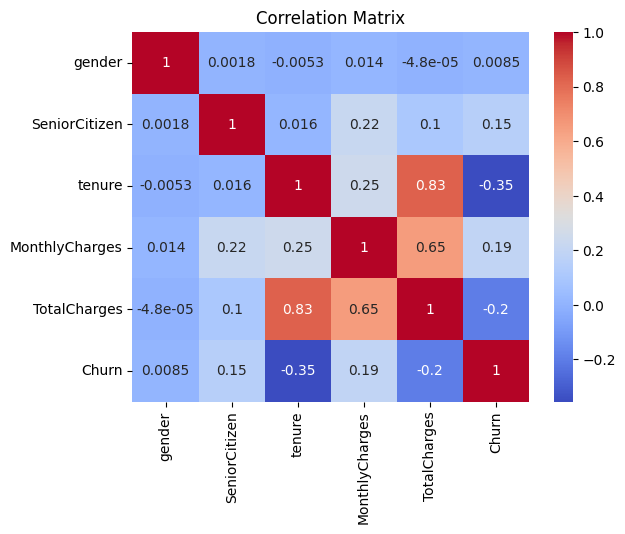

In [30]:
# Check the correlation matrix of all features
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Categorical features

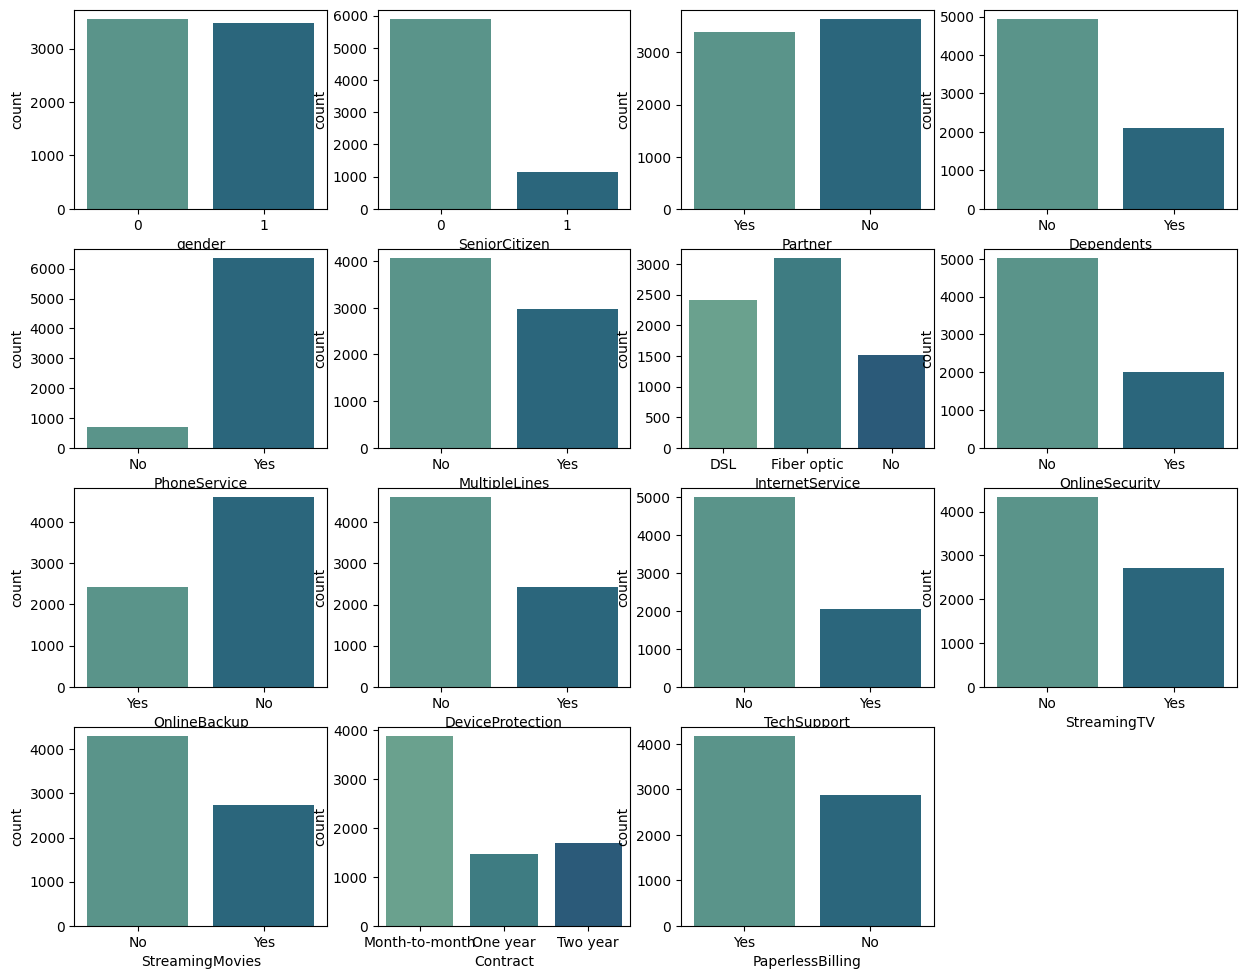

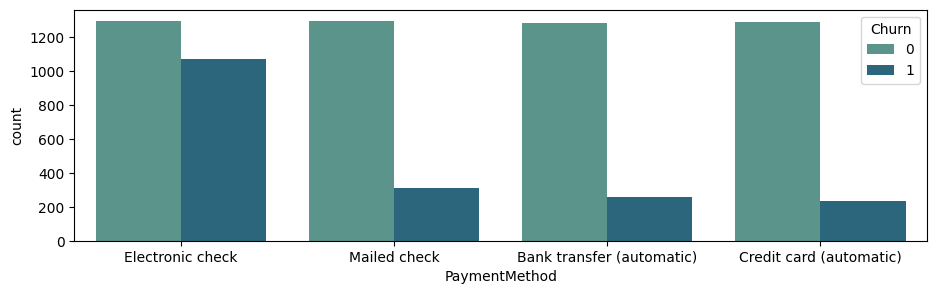

<Figure size 640x480 with 0 Axes>

In [31]:
# Visualizing Categorical features 
#countplot 

cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df, palette='crest')
plt.show() 
plt.tight_layout()

### *Q*7. Are customers with dependents less likely to churn compared to those without dependents?


From the **dependents graph** above, we can coclude that customers with dependants are less likey to churn compared to those without dependents

### *Q*8. Is there a relationship between the customers who get Device protections and churn?

From th **DeviceProtection graph** above, it is noted that many customers who churned did not have device protection. 
It is therefore necessary for the team to formulate incentive strategise to encourage customers to use the device protection service_. 

<AxesSubplot: xlabel='MonthlyCharges', ylabel='TotalCharges'>

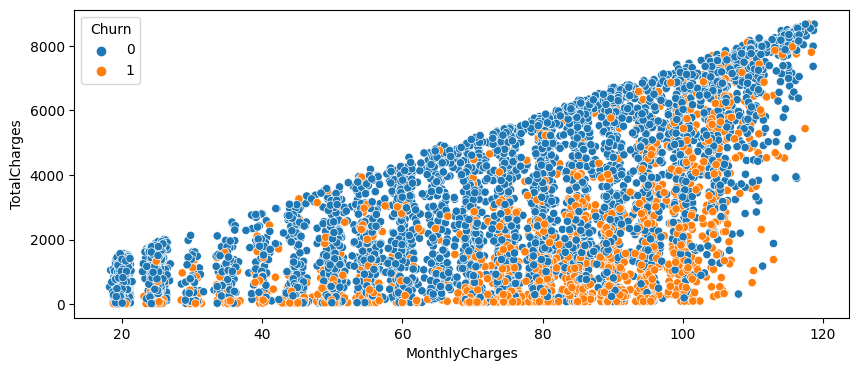

In [32]:
# Plot 'MonthlyCharges' vs 'TotalCharges'
# Scatter plot
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Features Encoding




In [97]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

# Columns to be one-hot encoded
columns_to_encode = ['Contract', 'customerID', 'gender', 'DeviceProtection', 'MultipleLines', 'InternetService',
                     'OnlineBackup', 'OnlineSecurity', 'PaymentMethod', 'SeniorCitizen', 'StreamingMovies',
                     'StreamingTV', 'TechSupport', 'TotalCharges']

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(pd.DataFrame(df)[columns_to_encode])

# Create a new DataFrame with one-hot encoded columns
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(columns_to_encode))

print(df)
print(df_onehot)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

#There are new columns with suffixes


In [98]:
# Find the columns increased and have suffixes from One hot encoding
df_onehot.columns

Index(['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'customerID_0002-ORFBO', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=13609)

## Features Scaling


In [99]:
# The columns to perform feature scaling on are 'tenure','MonthlyCharges' to have them on one scale
Cols_ft_scaling = ['tenure','MonthlyCharges']

In [100]:
# Perform feature scaling on the dataset using the fit_transform method
StandardScaler = StandardScaler()
scaled_features = StandardScaler.fit_transform(df[Cols_ft_scaling])


In [101]:
# Creating a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=Cols_ft_scaling)

print(df)
print(df_scaled)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

#The 2 columns(tenure,MonthlyCharges) are now on the same scale


In [136]:
# Create a DataFrame with scaled and encoded features
df_processed = df_scaled
df_processed = pd.concat([df_scaled, df_onehot,df])

# Dataset Splitting

In [137]:
print(df_processed.columns)

Index(['tenure', 'MonthlyCharges', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'customerID_0002-ORFBO',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       ...
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'Churn'],
      dtype='object', length=13630)


In [132]:
df["Churn"].value_counts().values

array([5174, 1869], dtype=int64)

In [138]:
# Assigning all the feature columns to variable x and target to variable y
y = df_processed['Churn']
X = df_processed.drop(columns=['Churn','customerID'],axis=1)

In [139]:
X.shape


(21129, 13628)

In [140]:
y.shape

(21129,)

In [141]:
# Use train_test_split with a random_state, and add stratify for Classification
# Split the dataset into Train set as 80% and Test set as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

MemoryError: Unable to allocate 2.14 GiB for an array with shape (13612, 21129) and data type float64

## Optional: Train set Balancing (for Classification only)

In [104]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Assuming X_train contains the feature matrix and y_train contains the target variable for the training dataset

# Define the under-sampling technique
undersampler = RandomUnderSampler()

# Apply under-sampling to balance the training dataset
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)



# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001


Logistic Regression Model

### Create the Model

In [105]:
# Logistic Regression Model
logregmodel = LogisticRegression()

### Train the Model

In [106]:
# Use the .fit method
logregmodel = LogisticRegression()
logregmodel.fit(X_train, y_train)

ValueError: could not convert string to float: 'Male'

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 


### Predict on a unknown dataset (Testset)

In [174]:
# Use .predict method # .predict_proba is available just for classification
logreg_predict=logregmodel.predict(X_test)

### Find Accuracy

In [176]:
# use the accuracy_score method
logregmodel_accuracy = round(metrics.accuracy_score(y_test,logreg_predict)*100,2)
print(logregmodel_accuracy)

76.1


### Creating confusion matrix

In [210]:
ConfusionMatrix_logreg = confusion_matrix(y_test, logreg_predict)
print(ConfusionMatrix_logreg)

[[281  97]
 [ 88 308]]


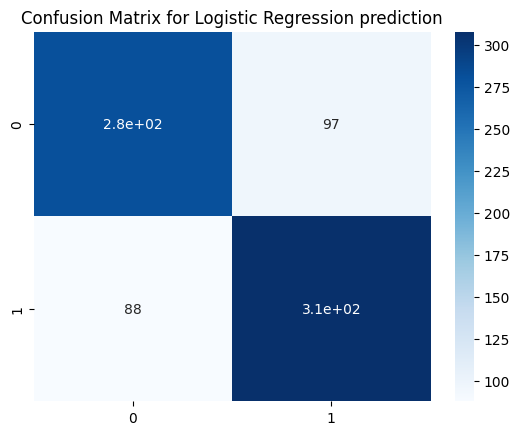

In [211]:
matrix_logreg=sns.heatmap(ConfusionMatrix_logreg,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression prediction')
plt.show(matrix_logreg)
plt.show()

## Simple Model #002

Support Vector Machine Model

### Create the Model

In [170]:
# Support Vector Machine Model
svcmodel = SVC(kernel='linear',random_state=1,probability=True)


### Train the Model

In [178]:
# Use the .fit method
svcmodel = SVC(kernel='linear',random_state=1,probability=True)
svcmodel.fit(X_train,y_train)

SVC(kernel='linear', probability=True, random_state=1)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 


### Predict on a unknown dataset (Testset)

In [179]:
# Use .predict method # .predict_proba is available just for classification
svc_predict=svcmodel.predict(X_test)

### Find accuracy

In [180]:
# use the accuracy_score method
svcmodel_accuracy = round(metrics.accuracy_score(y_test,svc_predict)*100,2)
print(svcmodel_accuracy)

75.97


### Creating the confusion matrix 

In [200]:
ConfusionMatrix_svc = confusion_matrix(y_test,svc_predict)
print(ConfusionMatrix_svc)

[[269 109]
 [ 77 319]]


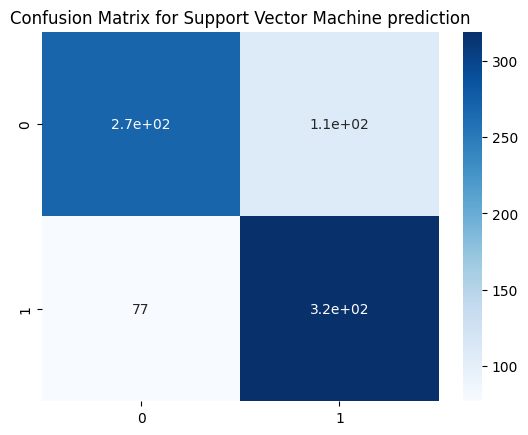

In [209]:
matrix_svc=sns.heatmap(ConfusionMatrix_svc,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Machine prediction')
plt.show(matrix_svc)
plt.show()

# Simple Model #003

K-Nearest Neighbor

### Create the Model

In [181]:
# K-Nearest Neighbor
knnmodel = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

### Train the Model

In [182]:
# Use the .fit method
knnmodel = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [183]:
# Use .predict method # .predict_proba is available just for classification
knn_predict=knnmodel.predict(X_test)

### Find accuracy

In [184]:
# use the accuracy_score method
knnmodel_accuracy = round(metrics.accuracy_score(y_test,knn_predict)*100,2)
print(knnmodel_accuracy)

74.68


### Creating the Confusion matrix

In [203]:
ConfusionMatrix_knn = confusion_matrix(y_test, knn_predict)
print(ConfusionMatrix_knn)

[[267 111]
 [ 85 311]]


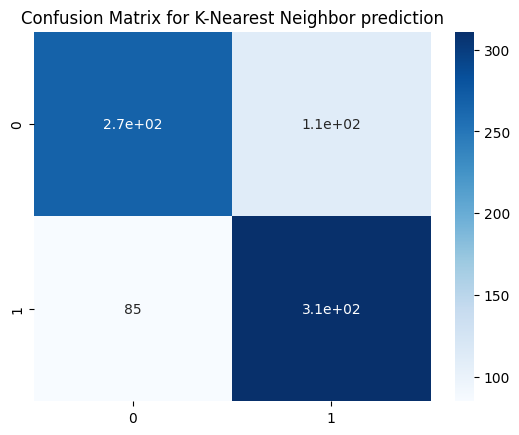

In [208]:
matrix_knn=sns.heatmap(ConfusionMatrix_knn,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Nearest Neighbor prediction')
plt.show(matrix_knn)
plt.show()

# Simple Model #004

Random Forest Classifier Model

### Create the Model

In [185]:
# Random Forest Classifier Model
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=1)

### Train the Model

In [186]:
# Use the .fit method to fit the model
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=1)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [187]:
# Use .predict method # .predict_proba is available just for classification
rf_predict=rfmodel.predict(X_test)

### Find accuracy

In [188]:
# use the accuracy_score method
rfmodel_accuracy = round(metrics.accuracy_score(y_test,rf_predict)*100,2)
print(rfmodel_accuracy)

76.36


### Creating the confusion matrix

In [206]:
ConfusionMatrix_rf = confusion_matrix(y_test, rf_predict)
print(ConfusionMatrix_rf)

[[290  88]
 [ 95 301]]


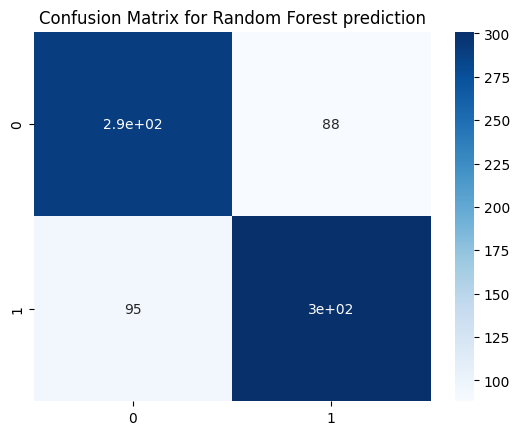

In [213]:
matrix_rf=sns.heatmap(ConfusionMatrix_rf,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest prediction')
plt.show(matrix_rf)
plt.show()

# Simple Model #004

### Create the Model

### Train the model

### Predict on a unknown dataset (Testset)

### Find accuracy

### Create confusion matrix

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [212]:
model_comparison = pd.DataFrame ({
     'Accuracy Score': [logregmodel_accuracy,svcmodel_accuracy,knnmodel_accuracy,rfmodel_accuracy],
     'Model_Name': ['Logistic Regression','Support Vector Machine','K-Nearest Neighbor','Random Forest']
   
})
model_comparison_df = model_comparison.sort_values(by='Accuracy Score',ascending=False)
model_comparison_df = model_comparison_df.set_index('Accuracy Score')
model_comparison_df.reset_index()

,Accuracy Score,Model_Name
0,76.36,Random Forest
1,76.10,Logistic Regression
2,75.97,Support Vector Machine
3,74.68,K-Nearest Neighbor


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

 We will only further evaluate the model that presents the  highest accuracy using hyperparameters.

### Hyperparameters tuning on Logistic Regression Model


In [ ]:
# Define the logistic regression model
logreg = logregmodel

In [ ]:
# Define the hyperparameter grid to search through
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}


In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)

In [ ]:
# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

In [ ]:
# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

### Hypereparameters tuning on Random Forest Classifier

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [ ]:
rf = rfmodel(random_state = 1)
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train);
print(g_search.best_params_)

In [ ]:
# Check the best parameter by using the best_params_ function
print(best_grid.score(X_test, y_test))

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app